In [ ]:
import requests
from bs4 import BeautifulSoup
from langchain.vectorstores import FAISS
from langchain.docstore.document import Document
from tqdm import tqdm
import re
from langchain.embeddings import HuggingFaceEmbeddings
from pprint import pprint

In [80]:
def get_clean_text(text):
    """Cleans text by removing unwanted characters and excessive whitespace."""
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s.,;!?-]', '', text)
    return text.strip()

In [84]:
s=get_clean_text("  This is a test.\n hello world again! pass : 123#$ ,*)  ")
pprint(s)

'This is a test. hello world again! pass  123 ,'


In [ ]:
def prepare_documents(devices_list):
    final_document_objects=[]
    output_dir = './Winng_design_diagrams'
    if os.path.exists(output_dir):
        os.rmdir(output_dir)
    else:
        os.makedirs(output_dir)
    
    for idx, device_url in tqdm(enumerate(devices_list)):
        image_file_path=None
        headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        }
        response = requests.get(device_url, headers=headers)
        print(response.status_code)
        #print(response.text)
        soup = BeautifulSoup(response.content, "html.parser")
        des=soup.find(class_="description")
        img=soup.find_all("svg")
        
        # Extract the description (all <p> tags before the benefits)
        description = " ".join(p.get_text() for p in des.find_all("p")[:-1])
        cleaned_description=get_clean_text(description)
        #print("Description:")
        #print(description)

        # Extract the system benefits (all <li> tags within the <ul>)
        benefits = [li.get_text() for li in des.find_all("li")]
        #print("\nSystem Benefits:")
        benefits_string=''
        for benefit in benefits:
            benefits_string=benefits_string+benefit+'.'

        cleaned_benefits=get_clean_text(benefits_string)
        content_string=cleaned_description+' '+cleaned_benefits

        svg_img=soup.find_all("svg")
        for i in svg_img:
            if('''color-interpolation-filters="sRGB"''' in str(i)):
                #print(i)
                #print('-'*50)
                image_file_path=os.path.join(output_dir,"block_diagram_{}.svg".format(idx))
                with open(image_file_path, "w", encoding="utf-8") as f:
                    f.write(str(i))
                #print("SVG block diagram saved successfully!")
        meta_data_dict={'image_path':image_file_path,'page_url':device_url}
        final_document_objects.append(Document(page_content=content_string,metadata=meta_data_dict))
    return final_document_objects

In [ ]:
electronics = ['computing','home-theater-entertainment','power-adapters-chargers','wearables']
devices_list = []
for electronic in electronics:
    base_url=f'https://www.renesas.com/en/applications/consumer-electronics/{electronic}'
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(base_url, headers=headers)
    print(response.status_code)
    #print(response.text)
    soup = BeautifulSoup(response.content, "html.parser")

    app_list = soup.find('div', class_='application-category-list')

    if app_list:
        urls = [a['href'] for a in app_list.find_all('a', href=True)]

        for idx in range(0, len(urls)):    
            if '#' in urls:
                urls.remove('#')
            else:
                break
        for url in urls:
            #print(url)
            key_word = url.replace('/en/applications/consumer-electronics/{}'.format(electronic), '')
            #print(key_word)

            devices_list.append(base_url + key_word)

print('Starting to prepare documents...')
res=prepare_documents(devices_list)
print(res)

200
200
Starting to prepare documents...


1it [00:01,  1.73s/it]

200


2it [00:03,  1.57s/it]

200


3it [00:04,  1.55s/it]

200


4it [00:06,  1.62s/it]

200


5it [00:08,  1.61s/it]

200


6it [00:09,  1.64s/it]

200


7it [00:11,  1.66s/it]

200


8it [00:13,  1.65s/it]

200
[Document(metadata={'image_path': './Winng_design_diagrams/block_diagram_0.svg', 'page_url': 'https://www.renesas.com/en/applications/consumer-electronics/computing/ddr5-gaming-dimm'}, page_content='As gaming evolves, customization becomes paramount in the industry. Renesas addresses this demand with its DDR5 system, featuring serial presence detect SPD hubs, power management integrated circuits PMICs, temperature sensors, and a control MCU. This system enables extensive addressable RGB ARGB lighting customization with millions of colors, ensuring enhanced user experience and performance optimization. 48MHz Arm Cortex-M23 MCU provides an I3C interface up to 4.6Mbps..High precision, low power, and small footprint optimized for efficient operation in DDR5 RDIMMs, LRDIMMs, and high-end gaming DIMMs..SPD hub allows the DDR5 system control bus to scale significantly beyond previous generations and enables a new class of data center equipment..PMIC maximizes DDR5 memory performance, dens

In [93]:
pprint(res)

[Document(metadata={'image_path': './Winng_design_diagrams/block_diagram_0.svg', 'page_url': 'https://www.renesas.com/en/applications/consumer-electronics/computing/ddr5-gaming-dimm'}, page_content='As gaming evolves, customization becomes paramount in the industry. Renesas addresses this demand with its DDR5 system, featuring serial presence detect SPD hubs, power management integrated circuits PMICs, temperature sensors, and a control MCU. This system enables extensive addressable RGB ARGB lighting customization with millions of colors, ensuring enhanced user experience and performance optimization. 48MHz Arm Cortex-M23 MCU provides an I3C interface up to 4.6Mbps..High precision, low power, and small footprint optimized for efficient operation in DDR5 RDIMMs, LRDIMMs, and high-end gaming DIMMs..SPD hub allows the DDR5 system control bus to scale significantly beyond previous generations and enables a new class of data center equipment..PMIC maximizes DDR5 memory performance, density,

In [ ]:
# Install the required packages
#%pip install sentence-transformers
#%pip install tf-keras

#from langchain.embeddings import HuggingFaceEmbeddings
Bge_model_embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-large-en", encode_kwargs={'normalize_embeddings': True})

/var/folders/4l/yl_ywzfd7zq4dvvthb6p9bg80000gn/T/ipykernel_98747/2200193825.py:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  Bge_model_embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-large-en", encode_kwargs={'normalize_embeddings': True})
/opt/anaconda3/envs/GenAI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Create a FAISS index
vector_store = FAISS.from_documents(tqdm(res), Bge_model_embeddings)

100%|██████████| 8/8 [00:00<00:00, 6791.02it/s]


In [ ]:
query = "Get me regarding to the smart pen application"
query_embedding = Bge_model_embeddings.embed_query(query)

# Perform a similarity search
similar_docs = vector_store.similarity_search(query, k=2)

for doc in similar_docs:
    print(f"Content: {doc.page_content}")
    print(f"Metadata: {doc.metadata}")
    print("---")


Content: This smart pen system is used to record human handwriting and store a copy in a digital format. The pen uses one IR LED to emit light onto the paper and an LED sensor to detect the reflection. The sensor will allow the movement of the pens pattern to be detected and record what is written. The LED and detector records the pens movement.The IR LED is invisible, so the user will not be distracted by any light while writing.Bluetooth Low Energy LE on the pen would transfer the digital data from the pen to a computer or tablet.An EEPROM on board will store the writing in memory for transfer to a notebook.Buttons for audio recording to start and to power onoff the pen.
Metadata: {'image_path': './Winng_design_diagrams/block_diagram_2.svg', 'page_url': 'https://www.renesas.com/en/applications/consumer-electronics/computing/smart-pen'}
---
Content: This solution is for a video IP phone with Hi-Fi audio support. The phone also has automatic noise cancellation and a voice wake-up funct

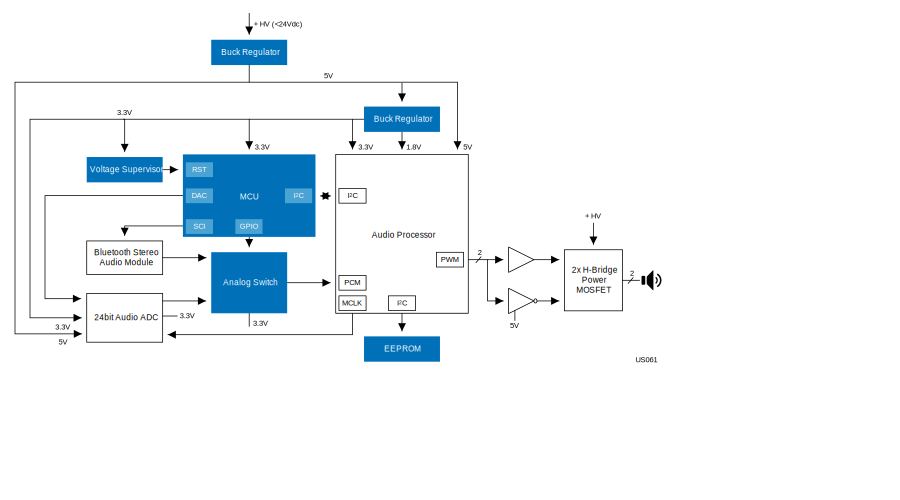

In [ ]:
# Display the svg formatted block diagram
from IPython.display import display, SVG

with open("block_diagram.svg", "r", encoding="utf-8") as f:
    svg_data = f.read()

# Display raw SVG data
display(SVG(data=svg_data))
